In [1]:
#https://git.aps.anl.gov/rodolakis/Macros_29id/-/blob/master/hklpy/Test_Bluesky_20210616.ipynb
import databroker
from apstools.utils import listruns
from IEX_29id.utils.initialize import *
from IEX_29id.devices.detectors import *
from IEX_29id.devices.beamline_energy import *
from IEX_29id.devices.kappa_motors import *
from IEX_29id.devices.kappa_motors import kappa_motors
from IEX_29id.devices.detectors import scaler
from bluesky.plans import scan
from bluesky.callbacks import LiveTable
from bluesky.callbacks.fitting import PeakStats
from bluesky.callbacks.mpl_plotting import plot_peak_stats
import matplotlib.pyplot as plt
import numpy as np

print(list(databroker.catalog))

I Wed-23:57:04 - ############################################################ startup
I Wed-23:57:04 - logging started
I Wed-23:57:04 - logging level = 10


['29idd', '29idd_retired_2021_12_01']


In [2]:
from IEX_29id.devices.slits import SetSlit4

In [50]:
scaler.stage_sigs['preset_time']=2

x_motor=kappa_motors.m2
y_motor=kappa_motors.m3
z_motor=kappa_motors.m4
kphi_motor=kappa_motors.m1
kap_motor=kappa_motors.m7
kth_motor=kappa_motors.m8
tth_motor=kappa_motors.m9

cat=databroker.catalog['29idd'];print('Number of scans in catalog: '+str(len(cat)))

sd.baseline.append(undulator)
sd.baseline.append(mono)
sd.baseline.append(centroid_m3r)
sd.baseline.append(x_motor)


Number of scans in catalog: 44


In [4]:
def plot_latest(pos,det):
    """
    pos = x_motor (object)
    det = D3
    
    """
    ds=cat[-1].primary.read()
    #ds.plot.scatter(x=pos.name,y=det.name)
    plt.plot(ds[pos.name], ds[det.name])
    plt.xlabel(pos.name)
    plt.ylabel(det.name)
    plt.grid(color='lightgrey')
    try:
        fname='/home/beams/29IDUSER/Documents/User_Folders/lastfigure.png'
        print(fname)
        plt.savefig(fname)
    except:
        print('error saving')
        pass
    plt.show()
    yield from bps.null()
    
def plot_latest_plan(pos,det):
    """
    pos = x_motor (object)
    det = D3
    
    """
    plot_latest(pos,det)
    yield from bps.null()

    
def plot_scatter(pos,det):
    """
    pos= x_motor (object)
    det=D3
    
    """
    ds=cat[-1].primary.read()
    ds.plot.scatter(x=pos.name,y=det.name)
    plt.xlabel(pos.name)
    plt.ylabel(det.name)
    plt.grid(color='lightgrey')


def plot_run(run,pos,det):
    """
    pos= x_motor (object)
    det=D3
    
    """
    ds=cat[run].primary.read()
    #ds.plot.scatter(x=pos.name,y=det.name)
    plt.plot(ds[pos.name], ds[det.name])
    plt.xlabel(pos.name)
    plt.ylabel(det.name)
    plt.grid(color='lightgrey')

    

In [5]:
    
def make_scan_list(StartStopStepLists):
    """
    Creates and returns a np.array with values based on StartStopStepList
    StartStopStepList is a list of lists defining regions for a table array
              StartStopStepList[[start1,stop1,step1],[start1,stop1,step1],...]
    Automatically removes duplicates and sorts into ascending order
    if you want descending
               myarray=XAS_Table(StartStopStepLists)[::-1]
    """
    table_array=np.array([])
    if type(StartStopStepLists) is not list:
        start=StartStopStepLists[0]
        stop=StartStopStepLists[1]
        step=StartStopStepLists[2]
        j=start
        while j<=stop:
            table_array=np.append(table_array, j)
            j+=step
    else:
        for i in range(0,len(StartStopStepLists)):
            start=StartStopStepLists[i][0]
            stop=StartStopStepLists[i][1]
            step=StartStopStepLists[i][2]
            j=start
            while j<=stop:
                table_array=np.append(table_array, j)
                j+=step
    table_array=np.unique(table_array)#removing duplicate
    table_array=np.sort(table_array) #sort into ascending order    

    return table_array.tolist()


In [5]:
# setting up baseline:
#   - documentation: https://blueskyproject.io/bluesky/tutorial.html#choose-baseline-devices
#   - example: https://github.com/BCDA-APS/bluesky_training/blob/main/bluesky/instrument/devices/aps_source.py
#from IEX_29id.devices.beamline_energy import undulator,mono,aps
#from IEX_29id.utils.initialize import sd
#sd.baseline.append(aps)
sd.baseline.append(undulator)
sd.baseline.append(mono)

In [6]:
scaler.stage_sigs['preset_time']=1
#`scaler.stage_sigs` is a dictionary.  
#The keys are the names of attributes of `scaler`. The values are set before data acquisition. Afterwards, the previous values are restored.
#scaler.stage_sigs["preset_time"] = 0.55 will configure the counting time to 0.55s before the scaler is triggered.

In [7]:
    
def find_z(ds,pos,det):
    """
    ds = cat[-1].primary.read()
    det='D3'
    pos='kappa_motors_m4'
    """
    half_intensity=float((np.max(ds[det])-np.min(ds[det]))/2)
    
    # array
    y_arr = ds[det]
    print("Array is : ", np.array(y_arr))

    # element to which nearest value is to be found
    y = 23693
    print("Value to which nearest element is to be found: ", y)

    # calculate the difference array
    difference_array = np.absolute(y_arr-y)

    # find the index of minimum element from the array
    index = difference_array.argmin()
    print("Nearest element to the given values is : ", float(y_arr[index]))
    print("Index of nearest value is : ", int(index))


    x_arr = np.array(ds[pos])
    print("Corresponding motor position of nearest value is : ", (x_arr[int(index)]))

In [ ]:
#mono.energy.position or undulator.energy.position
#   gets mono/id energy

#mono.energy.move(800) or undulator.energy.move(0.8)
#   move mono/id energy

#MoveStatus(done=True, pos=monochromator_energy, elapsed=1.2, success=True, settle_time=0.0)

#sts.enum_strs
#   returns ('Not Ready', 'Ready', 'Energy Step Move', 'Energy Fly Scan', 'Error')


#RE(bp.scan([scaler1,TEYcalc,D3calc,D4calc,MCPcalc],mono.energy,779-10,779+10,21))
#   https://nsls-ii.github.io/bluesky/plans.html

#listruns()
#   list data from databroker

# cat[-1].primary.read()['TEYcalc'].plot()
# plt.grid(color='lightgrey')
#   plot data



Transient Scan ID: 2     Time: 2021-12-01 16:17:19
Persistent Unique Scan ID: 'd231ed86-1388-4de2-bf43-11d7285fdbf4'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1839.9853797                   |
|              mono_mirror_pitch | 1.930902099609375              |
|             mono_grating_pitch | 2.6183849853515624             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+------------+------------+------------+------------+
|   seq_num |       time | kappa_motors_m9 |        TEY |         D3 |         D4 |        MCP |       mesh |
+-----------+------------+-----------------+------------+------------+------------+------------+------------+
|         1 | 16:17:27.0 |         -5.0000 |         25 |         

/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/callbacks/fitting.py:166: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer


End-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8844739198684692             |
|                    mono_energy | 1840.0487605                   |
|              mono_mirror_pitch | 1.9308380126953126             |
|             mono_grating_pitch | 2.6183874267578124             |
+--------------------------------+--------------------------------+





('d231ed86-1388-4de2-bf43-11d7285fdbf4',)

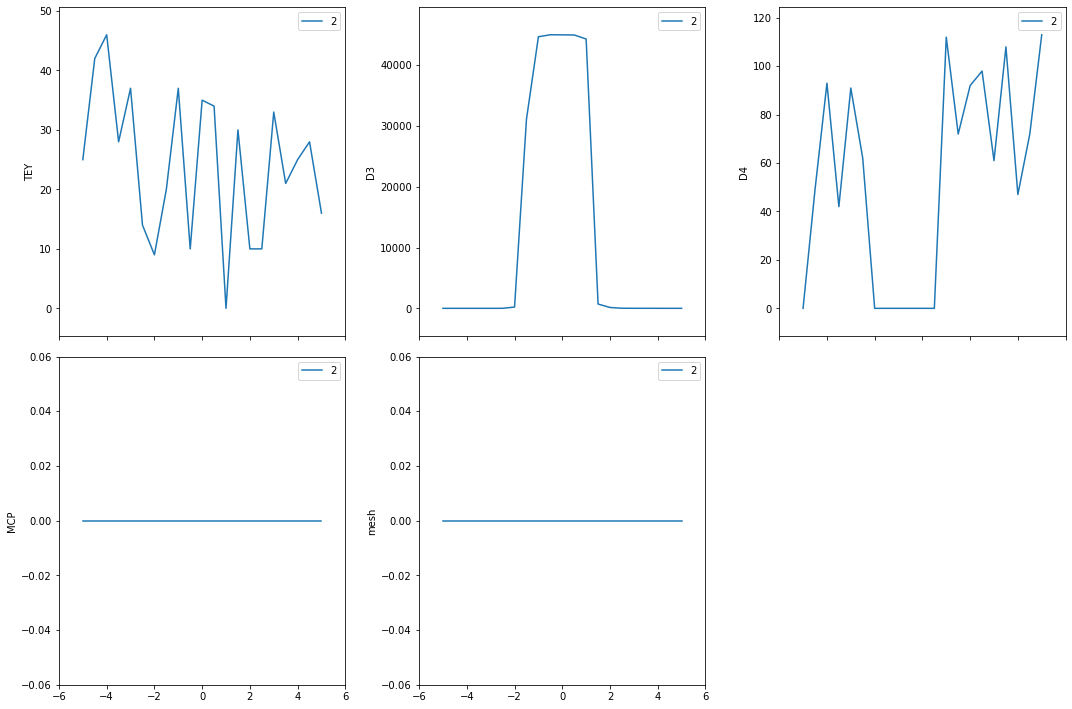

In [10]:
RE(bp.scan([scaler],tth_motor,-5,5,21))

In [13]:
 scaler.select_channels(['D3']) 



Transient Scan ID: 4     Time: 2021-12-01 16:22:12
Persistent Unique Scan ID: 'fa582d7c-9ab4-41d9-8c17-dd4a1f78731c'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8828586339950562             |
|                    mono_energy | 1839.9920686                   |
|              mono_mirror_pitch | 1.9308367919921876             |
|             mono_grating_pitch | 2.6183935302734374             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m9 |         D3 |
+-----------+------------+-----------------+------------+
|         1 | 16:22:20.4 |         -5.0000 |          9 |
|         2 | 16:22:21.5 |         -4.5000 |          8 |
|         3 | 16:22:22.7 |         -4.0000 |          8 |
|         4 | 16:22:23.9 |         -3.5000 |    

('fa582d7c-9ab4-41d9-8c17-dd4a1f78731c',)

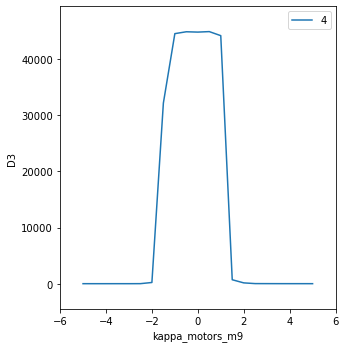

In [14]:
RE(bp.scan([scaler],tth_motor,-5,5,21))

In [15]:
RE(set_detector_plan('d4')); scaler.select_channels(['D4']) 

()

In [16]:
tth_motor.move(0)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=16.8, success=True, settle_time=0.0)

In [19]:
scaler.select_channels(['D4'])



Transient Scan ID: 6     Time: 2021-12-01 16:27:29
Persistent Unique Scan ID: '1ba6e62f-4a74-4fe5-976e-6ff59c3c46ec'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8828586339950562             |
|                    mono_energy | 1840.0768429                   |
|              mono_mirror_pitch | 1.9308532714843751             |
|             mono_grating_pitch | 2.6183862060546876             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m9 |         D4 |
+-----------+------------+-----------------+------------+
|         1 | 16:27:30.7 |         -0.5000 |        106 |
|         2 | 16:27:31.2 |         -0.4500 |         90 |
|         3 | 16:27:31.7 |         -0.4000 |         53 |
|         4 | 16:27:32.3 |         -0.3500 |    

('1ba6e62f-4a74-4fe5-976e-6ff59c3c46ec',)

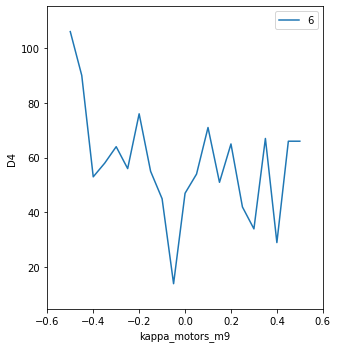

In [20]:
RE(bp.scan([scaler],tth_motor,-0.5,0.5,21))

In [21]:
RE(set_detector_plan('d3')); scaler.select_channels(['D3']) 



Transient Scan ID: 7     Time: 2021-12-01 17:47:53
Persistent Unique Scan ID: 'd5a7ede0-4176-46d8-83f8-61f4c2237924'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8828586339950562             |
|                    mono_energy | 1840.0244541                   |
|              mono_mirror_pitch | 1.930836181640625              |
|             mono_grating_pitch | 2.6183874267578124             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m9 |         D3 |
+-----------+------------+-----------------+------------+
|         1 | 17:47:57.2 |         -5.0000 |          6 |
|         2 | 17:47:58.3 |         -4.5000 |          6 |
|         3 | 17:47:59.5 |         -4.0000 |          7 |
|         4 | 17:48:00.6 |         -3.5000 |    

('d5a7ede0-4176-46d8-83f8-61f4c2237924',)

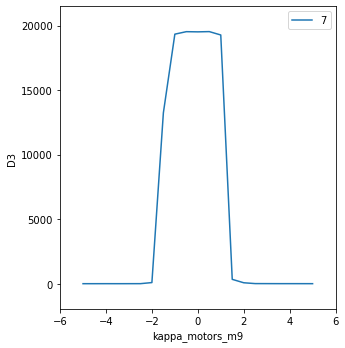

In [22]:
RE(bp.scan([scaler],tth_motor,-5,5,21))



Transient Scan ID: 8     Time: 2021-12-01 17:48:47
Persistent Unique Scan ID: '169d00eb-e088-49d3-83b0-bf995dc04835'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8828586339950562             |
|                    mono_energy | 1840.0655171                   |
|              mono_mirror_pitch | 1.9309033203125001             |
|             mono_grating_pitch | 2.618414892578125              |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m9 |         D3 |
+-----------+------------+-----------------+------------+
|         1 | 17:48:53.8 |         -3.0000 |          7 |
|         2 | 17:48:54.4 |         -2.9000 |          7 |
|         3 | 17:48:55.1 |         -2.8000 |          6 |
|         4 | 17:48:55.7 |         -2.7000 |    

RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


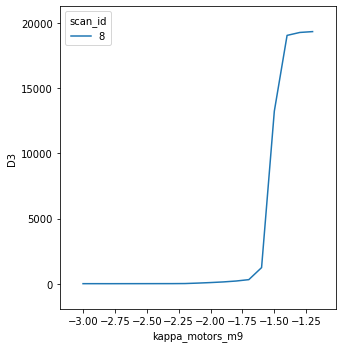

In [23]:
RE(bp.scan([scaler],tth_motor,-3,3,61))

In [24]:
RE.abort()

Aborting: running cleanup and marking exit_status as 'abort'...
+-----------+------------+-----------------+------------+
generator scan ['169d00eb'] (scan num: 8)
End-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8820515871047974             |
|                    mono_energy | 1839.9652471                   |
|              mono_mirror_pitch | 1.9308563232421876             |
|             mono_grating_pitch | 2.6184234375                   |
+--------------------------------+--------------------------------+





Run aborted
Traceback (most recent call last):
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/run_engine.py", line 1503, in _run
    msg = self._plan_stack[-1].send(resp)
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 1307, in __call__
    return (yield from plan)
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 1162, in baseline_wrapper
    return (yield from plan_mutator(plan, insert_baseline))
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 170, in plan_mutator
    raise ex
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 123, in plan_mutator
    msg = plan_stack[-1].send(ret)
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky

('169d00eb-e088-49d3-83b0-bf995dc04835',)

In [26]:
srs.A3.gain.get()

4.9999999999999996e-06

In [27]:
srs.A3.sensitivity_unit.get()

'uA/V'

In [28]:
srs.A3.sensitivity_value.get()

'5'

In [30]:
srs.A3.sensitivity_value.put('2')

In [31]:
srs.A3.gain.get()

2e-06



Transient Scan ID: 9     Time: 2021-12-01 17:56:50
Persistent Unique Scan ID: '5dbcffb5-8ca7-4386-b134-939d6e547c27'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1840.0434621                   |
|              mono_mirror_pitch | 1.9308843994140625             |
|             mono_grating_pitch | 2.618392919921875              |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m9 |         D3 |
+-----------+------------+-----------------+------------+
|         1 | 17:56:52.6 |         -3.0000 |         10 |
|         2 | 17:56:53.2 |         -2.9000 |         11 |
|         3 | 17:56:53.9 |         -2.8000 |         10 |
|         4 | 17:56:54.6 |         -2.7000 |    

('5dbcffb5-8ca7-4386-b134-939d6e547c27',)

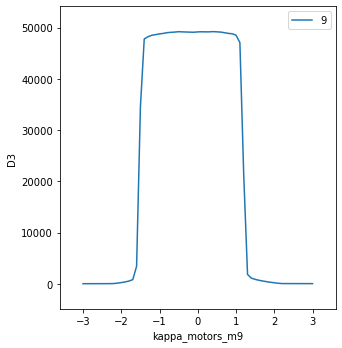

In [32]:
RE(bp.scan([scaler],tth_motor,-3,3,61))

In [33]:
tth_motor.name

'kappa_motors_m9'

In [35]:
D3.name

'D3'

In [36]:
from bluesky.plans import scan
from bluesky.callbacks import LiveTable

from bluesky.callbacks.scientific import PeakStats, plot_peak_stats

ps = PeakStats('kappa_motors_m9', 'D3')

#https://nsls-ii.github.io/examples/fit-peaks.html

ModuleNotFoundError: No module named 'bluesky.callbacks.scientific'

In [37]:
from bluesky.callbacks.fitting import PeakStats

In [38]:
ps = PeakStats('kappa_motors_m9', 'D3')

In [57]:
subs = [LiveTable(['kappa_motors_m9', 'D3']), ps]



Transient Scan ID: 11     Time: 2021-12-01 18:15:01
Persistent Unique Scan ID: '82c6ed28-67fd-4a3c-b24f-3b07dffbfad2'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8828586339950562             |
|                    mono_energy | 1840.040548                    |
|              mono_mirror_pitch | 1.93087890625                  |
|             mono_grating_pitch | 2.6184020751953123             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m9 |         D3 |
+-----------+------------+-----------------+------------+


+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m9 |         D3 |
+-----------+------------+-----------------+------------+
|         1 | 18:15:10.9 |         -3.0000 | 

('82c6ed28-67fd-4a3c-b24f-3b07dffbfad2',)

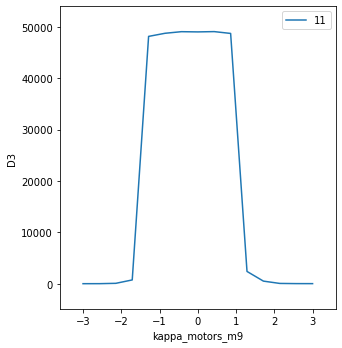

In [43]:
RE(scan([scaler], tth_motor, -3, 3, 15), subs)

In [44]:
ps.fwhm

2.5804671332167315

In [45]:
import matplotlib.pyplot as plt

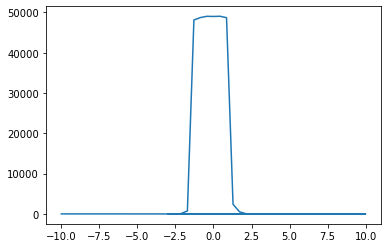

In [49]:
plt.plot(ps.x_data,ps.y_data)

In [51]:
ps.stats

Stats(min=(7.143000000000001, 10.0), max=(0.42900000000000205, 49064.0), com=-0.20345075135898402, cen=-0.2088633273821794, crossings=array([-1.49909689,  1.08137024]), fwhm=2.5804671332167315, lin_bkg=None)

In [52]:
from bluesky.callbacks.mpl_plotting import plot_peak_stats

{'color': 'k'} cen
{'color': 'r'} com
{'color': 'b'} max
{'color': 'm'} min


{'points': <matplotlib.lines.Line2D at 0x7fef75fe1a30>,
 'vlines': [<matplotlib.lines.Line2D at 0x7fef76b59490>,
 'legend': <matplotlib.legend.Legend at 0x7fef75af0400>}

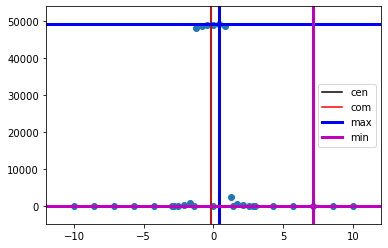

In [53]:
plot_peak_stats(ps)

In [54]:
tth_motor.move(0)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=2.6, success=True, settle_time=0.0)

In [56]:
z_motor.move(1650)

MoveStatus(done=True, pos=kappa_motors_m4, elapsed=0.5, success=True, settle_time=0.0)



Transient Scan ID: 12     Time: 2021-12-01 18:27:52
Persistent Unique Scan ID: 'e1c733b4-4255-476a-9ff0-991ff5cd270e'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8828586339950562             |
|                    mono_energy | 1839.9974329                   |
|              mono_mirror_pitch | 1.9308978271484376             |
|             mono_grating_pitch | 2.618410009765625              |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m4 |         D3 |
+-----------+------------+-----------------+------------+


+-----------+------------+------------+
|   seq_num |       time |         D3 |
+-----------+------------+------------+
|         1 | 18:27:56.6 |    899.78500000 |      48391 |
|         1 | 18:27:56.6 |      48391 |
|

('e1c733b4-4255-476a-9ff0-991ff5cd270e',)

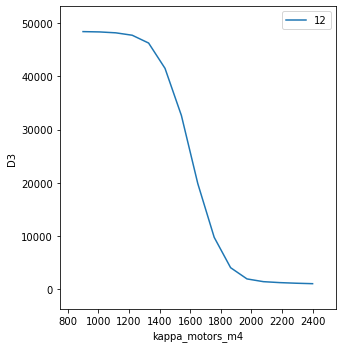

In [59]:
RE(bp.rel_scan([scaler], z_motor, -750, 750, 15), subs)

In [60]:
ps.stats

Stats(min=(7.143000000000001, 10.0), max=(0.42900000000000205, 49064.0), com=-0.20345075135898402, cen=-0.2088633273821794, crossings=array([-1.49909689,  1.08137024]), fwhm=2.5804671332167315, lin_bkg=None)

In [62]:
subs = [LiveTable(['kappa_motors_m9', 'D3']), ps]



Transient Scan ID: 13     Time: 2021-12-01 18:29:31
Persistent Unique Scan ID: '94a8c9fe-ef75-40e2-891f-581102d9bc7a'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1840.0065061                   |
|              mono_mirror_pitch | 1.9309045410156251             |
|             mono_grating_pitch | 2.618410009765625              |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m4 |         D3 |
+-----------+------------+-----------------+------------+


+-----------+------------+------------+
|   seq_num |       time |         D3 |
+-----------+------------+------------+
|         1 | 18:29:35.1 |    899.53300000 |      48394 |
|         1 | 18:29:35.1 |      48394 |
|

('94a8c9fe-ef75-40e2-891f-581102d9bc7a',)

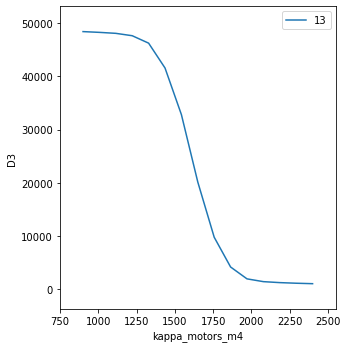

In [63]:
RE(bp.rel_scan([scaler], z_motor, -750, 750, 15), subs)

In [64]:
ps.stats

Stats(min=(7.143000000000001, 10.0), max=(0.42900000000000205, 49064.0), com=-0.20345075135898402, cen=-0.2088633273821794, crossings=array([-1.49909689,  1.08137024]), fwhm=2.5804671332167315, lin_bkg=None)

{'color': 'k'} cen
{'color': 'r'} com
{'color': 'b'} max
{'color': 'm'} min


{'points': <matplotlib.lines.Line2D at 0x7fef7545ebe0>,
 'vlines': [<matplotlib.lines.Line2D at 0x7fef74f77f10>,
 'legend': <matplotlib.legend.Legend at 0x7fef74f77cd0>}

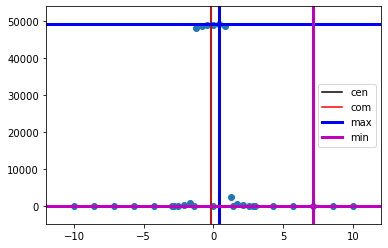

In [65]:
plot_peak_stats(ps)

In [66]:
ps2 = PeakStats('kappa_motors_m9', 'D3')

In [67]:
subs2 = [LiveTable(['kappa_motors_m9', 'D3']), ps2]



Transient Scan ID: 14     Time: 2021-12-01 18:37:11
Persistent Unique Scan ID: '92d6a58f-ceb0-49ae-8f96-9c71fee4ba7d'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1839.9610749                   |
|              mono_mirror_pitch | 1.9308758544921876             |
|             mono_grating_pitch | 2.6183984130859375             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m4 |         D3 |
+-----------+------------+-----------------+------------+


+-----------+------------+------------+
|   seq_num |       time |         D3 |
+-----------+------------+------------+
|         1 | 18:37:16.0 |    899.33400000 |      48430 |
|         1 | 18:37:16.0 |      48430 |
|

('92d6a58f-ceb0-49ae-8f96-9c71fee4ba7d',)

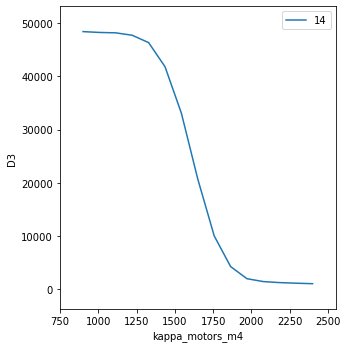

In [68]:
RE(bp.rel_scan([scaler], z_motor, -750, 750, 15), subs2)

In [69]:
ps2.stats

AttributeError: 'PeakStats' object has no attribute 'x_data'

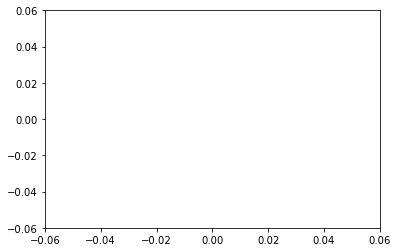

In [70]:
plot_peak_stats(ps2)

In [71]:
from bluesky.callbacks.fitting import LiveFit

In [ ]:
#see livefit https://nsls-ii.github.io/bluesky/callbacks.html

import numpy as np
import lmfit
#from scipy.special import erf

def gaussian(x, A, sigma, x0):
    return 2/sqrt(pi)*integral(exp(-t**2), t=0..z)

model = lmfit.Model(erf)
init_guess = {'A': 5000,
              'sigma': lmfit.Parameter('sigma', 3, min=0),
              'x0': -0.2}


In [74]:
run=cat[-1]
ds = run.primary.read()

In [76]:
list(run)

['baseline', 'primary']

In [77]:
ds

<xarray.Dataset>
Dimensions:                        (time: 15)
Coordinates:
  * time                           (time) float64 1.638e+09 ... 1.638e+09
Data variables:
    D3                             (time) float64 4.843e+04 ... 1.044e+03
    scaler_time                    (time) float64 0.1 0.1 0.1 ... 0.1 0.1 0.1
    kappa_motors_m4                (time) float64 899.3 1.006e+03 ... 2.399e+03
    kappa_motors_m4_user_setpoint  (time) float64 899.3 1.006e+03 ... 2.399e+03
    kappa_motors_m4_sync           (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
    kappa_motors_m4_desc           (time) <U1 'z' 'z' 'z' 'z' ... 'z' 'z' 'z'
    kappa_motors_m4_homf           (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
    kappa_motors_m4_dval           (time) float64 899.3 1.006e+03 ... 2.399e+03

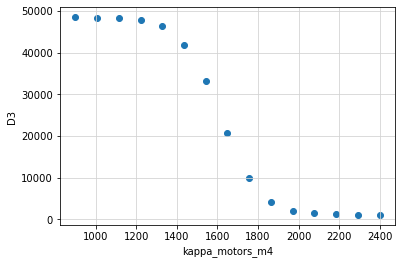

In [85]:
ds.plot.scatter(x='kappa_motors_m4',y='D3')
plt.grid(color='lightgrey')

In [88]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [89]:
plt.plot(ds["kappa_motors_m4"], ds["D3"])
plt.xlabel("z")
plt.ylabel("D3")
plt.grid(color='lightgrey')

In [94]:
import numpy as np

In [95]:
kappa_motors_m4

<xarray.DataArray 'D3' ()>
array(48430.)

In [96]:
np.min(ds["D3"])

<xarray.DataArray 'D3' ()>
array(1044.)

In [97]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [99]:
half_intensity=(np.max(ds["D3"])-np.min(ds["D3"]))/2

In [102]:
half_intensity

<xarray.DataArray 'D3' ()>
array(23693.)

In [103]:
find_nearest(ds['D3'],23693)

20694.0

In [112]:
# array
y_arr = ds['D3']
print("Array is : ", np.array(y_arr))
  
# element to which nearest value is to be found
y = 23693
print("Value to which nearest element is to be found: ", y)
  
# calculate the difference array
difference_array = np.absolute(y_arr-y)
  
# find the index of minimum element from the array
index = difference_array.argmin()
print("Nearest element to the given values is : ", float(y_arr[index]))
print("Index of nearest value is : ", int(index))


x_arr = np.array(ds['kappa_motors_m4'])
print("Corresponding motor position of nearest value is : ", (x_arr[7]))

Array is :  [48430. 48272. 48198. 47743. 46363. 41833. 33077. 20694. 10032.  4263.
  1978.  1438.  1247.  1133.  1044.]
Value to which nearest element is to be found:  23693
Nearest element to the given values is :  20694.0
Index of nearest value is :  7
Corresponding motor position of nearest value is :  1649.337


In [107]:
int(index)

7



Transient Scan ID: 16     Time: 2021-12-01 19:16:53
Persistent Unique Scan ID: '2009b011-3bba-4a6c-8f9e-380dcd37e45d'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1840.0653185                   |
|              mono_mirror_pitch | 1.9309088134765626             |
|             mono_grating_pitch | 2.6183971923828127             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+------------+------------+------------+------------+
|   seq_num |       time | kappa_motors_m4 |        TEY |         D3 |         D4 |        MCP |       mesh |
+-----------+------------+-----------------+------------+------------+------------+------------+------------+
|         1 | 19:16:57.5 |    900.03100000 |         30 |      48

/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/callbacks/fitting.py:166: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer


End-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1840.007632                    |
|              mono_mirror_pitch | 1.9308990478515626             |
|             mono_grating_pitch | 2.61842099609375               |
+--------------------------------+--------------------------------+





('2009b011-3bba-4a6c-8f9e-380dcd37e45d',)

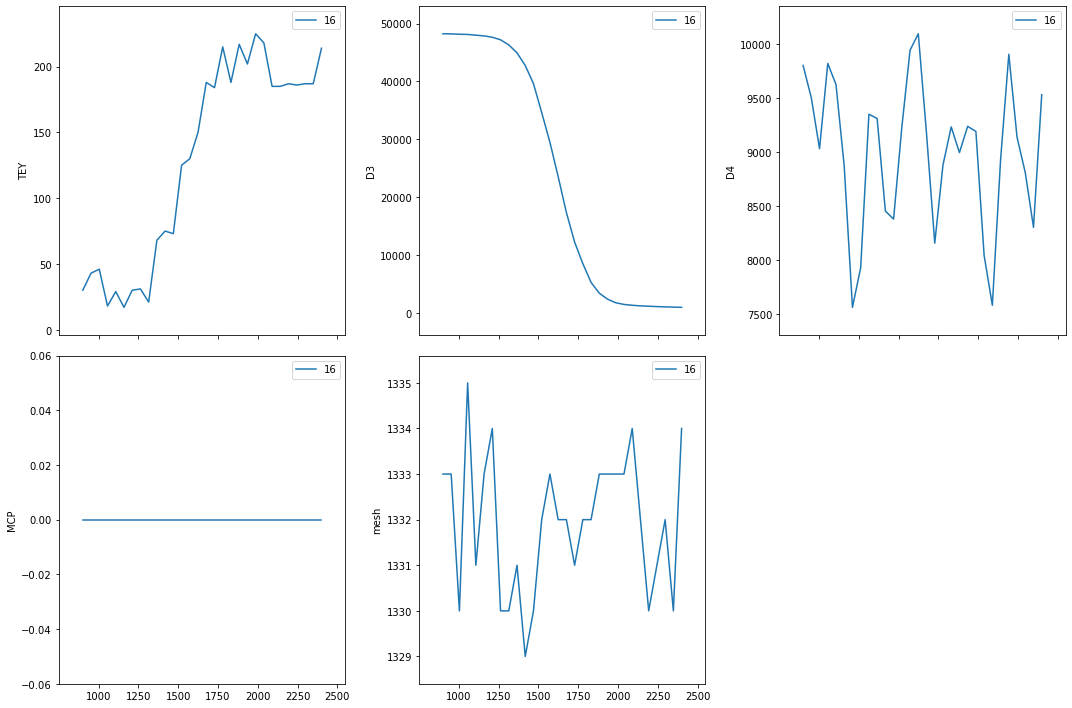

In [17]:
RE(bp.rel_scan([scaler], z_motor, -750, 750, 30))

In [18]:
ds=cat[-1].primary.read()

In [19]:
find_z(ds,'D3','kappa_motors_m4')

Array is :  [48234. 48212. 48151. 48119. 47986. 47865. 47634. 47191. 46316. 44939.
 42755. 39627. 34640. 29510. 23586. 17397. 12299.  8575.  5337.  3479.
  2452.  1830.  1544.  1398.  1296.  1233.  1176.  1123.  1082.  1041.]
Value to which nearest element is to be found:  23693
Nearest element to the given values is :  23586.0
Index of nearest value is :  14
Corresponding motor position of nearest value is :  1624.172


In [20]:
z_motor.move(1624)

MoveStatus(done=True, pos=kappa_motors_m4, elapsed=0.2, success=True, settle_time=0.0)

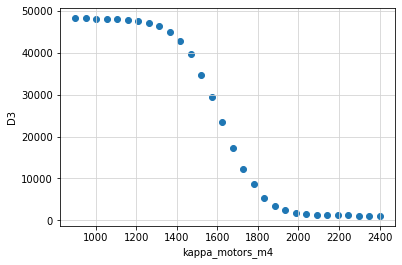

In [21]:
ds.plot.scatter(x='kappa_motors_m4',y='D3')
plt.grid(color='lightgrey')

In [23]:
scaler.select_channels(['D3'])

In [24]:
14000/100

140.0



Transient Scan ID: 17     Time: 2021-12-01 19:20:31
Persistent Unique Scan ID: '8d732fd6-416e-46c8-a284-000e6ca8bcd8'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1840.0214738                   |
|              mono_mirror_pitch | 1.93087646484375               |
|             mono_grating_pitch | 2.618383154296875              |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+
|   seq_num |       time | kappa_motors_m2 |         D3 |
+-----------+------------+-----------------+------------+
|         1 | 19:21:10.4 |  -7503.61400000 |      25368 |
|         2 | 19:21:11.2 |  -7397.54600000 |      27814 |
|         3 | 19:21:11.9 |  -7289.59700000 |      27684 |
|         4 | 19:21:12.7 |  -7181.76200000 |   

('8d732fd6-416e-46c8-a284-000e6ca8bcd8',)

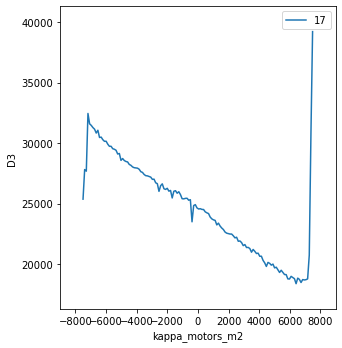

In [25]:
RE(bp.rel_scan([scaler], x_motor, -7500, 7500, 140))

In [31]:
x_motor.name

'kappa_motors_m2'

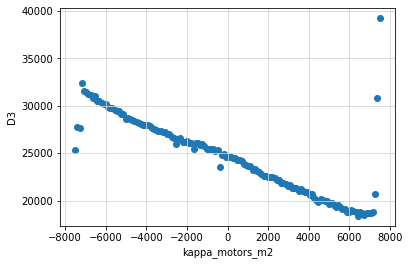

In [38]:
plot_latest(x_motor,D3)

In [34]:
D3.name

'D3'

In [ ]:
kth_motor.move(57.045+90)

MoveStatus(done=True, pos=kappa_motors_m8, elapsed=2.0, success=True, settle_time=0.0)

In [42]:
RE(bp.rel_scan([scaler], x_motor, -7500, 7500, 140))



Transient Scan ID: 18     Time: 2021-12-01 19:36:48
Persistent Unique Scan ID: '84455207-77eb-47a1-a88d-4227dbca8d52'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1840.0006781                   |
|              mono_mirror_pitch | 1.9308770751953126             |
|             mono_grating_pitch | 2.61841611328125               |
+--------------------------------+--------------------------------+
A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.Deferred pause acknowledged. Continuing to checkpoint.

trying a second time
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


In [43]:
RE.abort()

Aborting: running cleanup and marking exit_status as 'abort'...


Run aborted
Traceback (most recent call last):
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/run_engine.py", line 1503, in _run
    msg = self._plan_stack[-1].send(resp)
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 1307, in __call__
    return (yield from plan)
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 1162, in baseline_wrapper
    return (yield from plan_mutator(plan, insert_baseline))
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 170, in plan_mutator
    raise ex
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 123, in plan_mutator
    msg = plan_stack[-1].send(ret)
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky

('84455207-77eb-47a1-a88d-4227dbca8d52',)

In [46]:
scaler.select_channels(['TEY','mesh']) 



Transient Scan ID: 19     Time: 2021-12-01 19:39:44
Persistent Unique Scan ID: 'bf03ec3c-bf5c-4b35-8cfb-0792c40dde80'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1840.053198                    |
|              mono_mirror_pitch | 1.9308514404296875             |
|             mono_grating_pitch | 2.618385595703125              |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+------------+
|   seq_num |       time | kappa_motors_m2 |        TEY |       mesh |
+-----------+------------+-----------------+------------+------------+
|         1 | 19:40:22.9 |  -7503.62800000 |       3120 |       6622 |
|         2 | 19:40:23.7 |  -7397.72900000 |       3309 |       6669 |
|         3 | 19:40:24.5 |  -7289.933000

('bf03ec3c-bf5c-4b35-8cfb-0792c40dde80',)

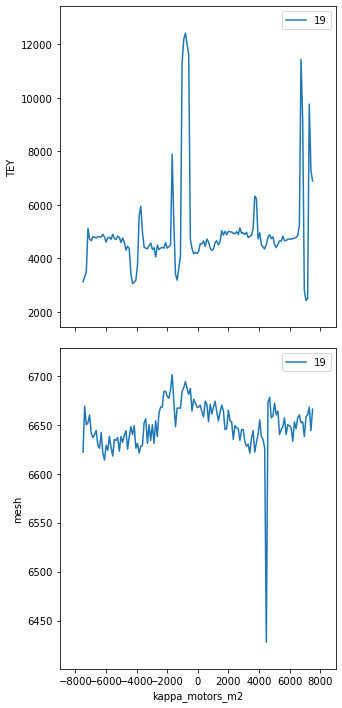

In [47]:
RE(bp.rel_scan([scaler], x_motor, -7500, 7500, 140))

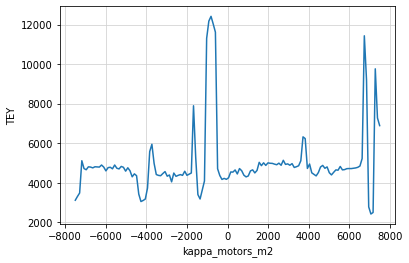

In [60]:
%matplotlib inline
plot_latest(x_motor,TEY)


In [57]:
x_motor.move(-5750)

MoveStatus(done=True, pos=kappa_motors_m2, elapsed=1.3, success=True, settle_time=0.0)

In [61]:
kth_motor.move(57.045+45)

MoveStatus(done=True, pos=kappa_motors_m8, elapsed=32.2, success=True, settle_time=0.0)

In [62]:
tth_motor.move(90)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=67.6, success=True, settle_time=0.0)

In [63]:
kth_motor.move(57.045+45)

MoveStatus(done=True, pos=kappa_motors_m8, elapsed=30.2, success=True, settle_time=0.0)

In [69]:
mono.energy.move(1850)

MoveStatus(done=True, pos=mono_energy, elapsed=1.4, success=True, settle_time=0.0)

In [71]:
scaler.select_channels(['TEY','D3','MCP','mesh'])



Transient Scan ID: 20     Time: 2021-12-01 20:02:19
Persistent Unique Scan ID: '12cfa254-5232-4ac9-ae76-3ae1257d238a'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8828586339950562             |
|                    mono_energy | 1849.9792264                   |
|              mono_mirror_pitch | 1.9256652832031251             |
|             mono_grating_pitch | 2.6112994140625                |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |    MCPcalc |    TEYcalc |        TEY |         D3 |        MCP |       mesh |     D3calc |
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+

('12cfa254-5232-4ac9-ae76-3ae1257d238a',)

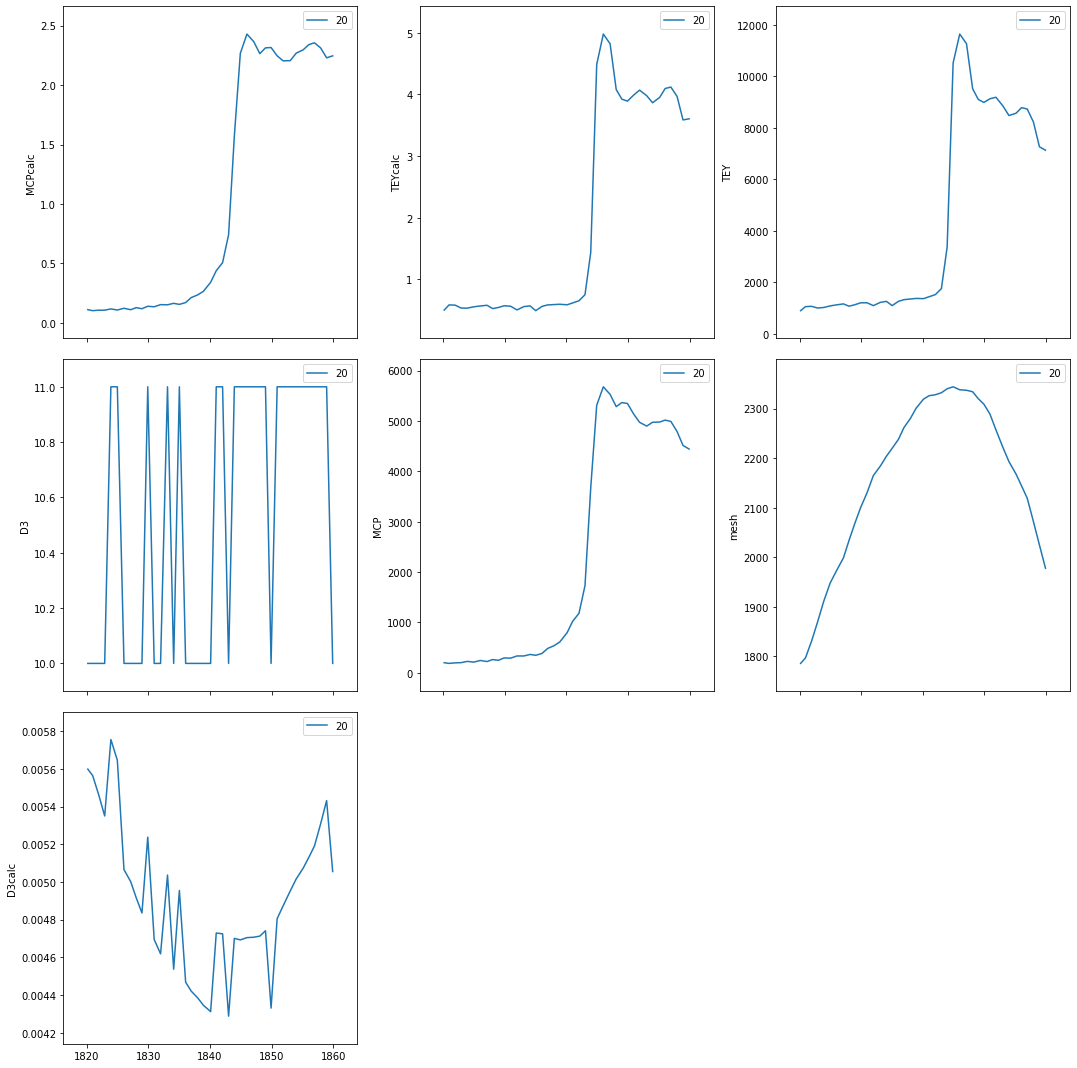

In [72]:
RE(bp.scan([scaler,TEYcalc,D3calc,MCPcalc],mono.energy,1820,1860,41))

In [73]:
mono.energy.name

'mono_energy'

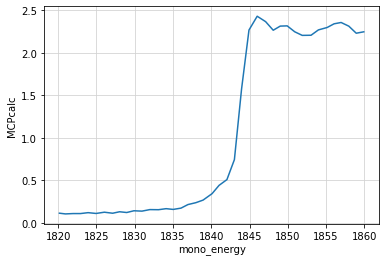

In [14]:
#%matplotlib
plot_run(20,mono.energy,MCPcalc)

In [77]:
scaler.select_channels(['TEY','MCP','mesh'])

In [ ]:
RE(bp.scan([scaler,TEYcalc,MCPcalc],mono.energy,1820,1860,40*4+1))



Transient Scan ID: 21     Time: 2021-12-01 20:08:23
Persistent Unique Scan ID: '531b045f-a924-428d-aed8-9fd441cadbfc'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1860.0410796                   |
|              mono_mirror_pitch | 1.92049560546875               |
|             mono_grating_pitch | 2.6042907470703125             |
+--------------------------------+--------------------------------+
New stream: 'primary'


/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/callbacks/best_effort.py:241: UserWarning: Starting a Matplotlib GUI outside of the main thread will likely fail.
  fig = plt.figure(fig_name)




Transient Scan ID: 22     Time: 2021-12-01 20:21:33
Persistent Unique Scan ID: 'ea5cdfe6-8f2e-4eba-8b48-9df81da26a33'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8820515871047974             |
|                    mono_energy | 1820.050104                    |
|              mono_mirror_pitch | 1.941527099609375              |
|             mono_grating_pitch | 2.6327782958984374             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |        TEY |         D3 |         D4 |        MCP |       mesh |    TEYcalc |    MCPcalc |
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+

('ea5cdfe6-8f2e-4eba-8b48-9df81da26a33',)

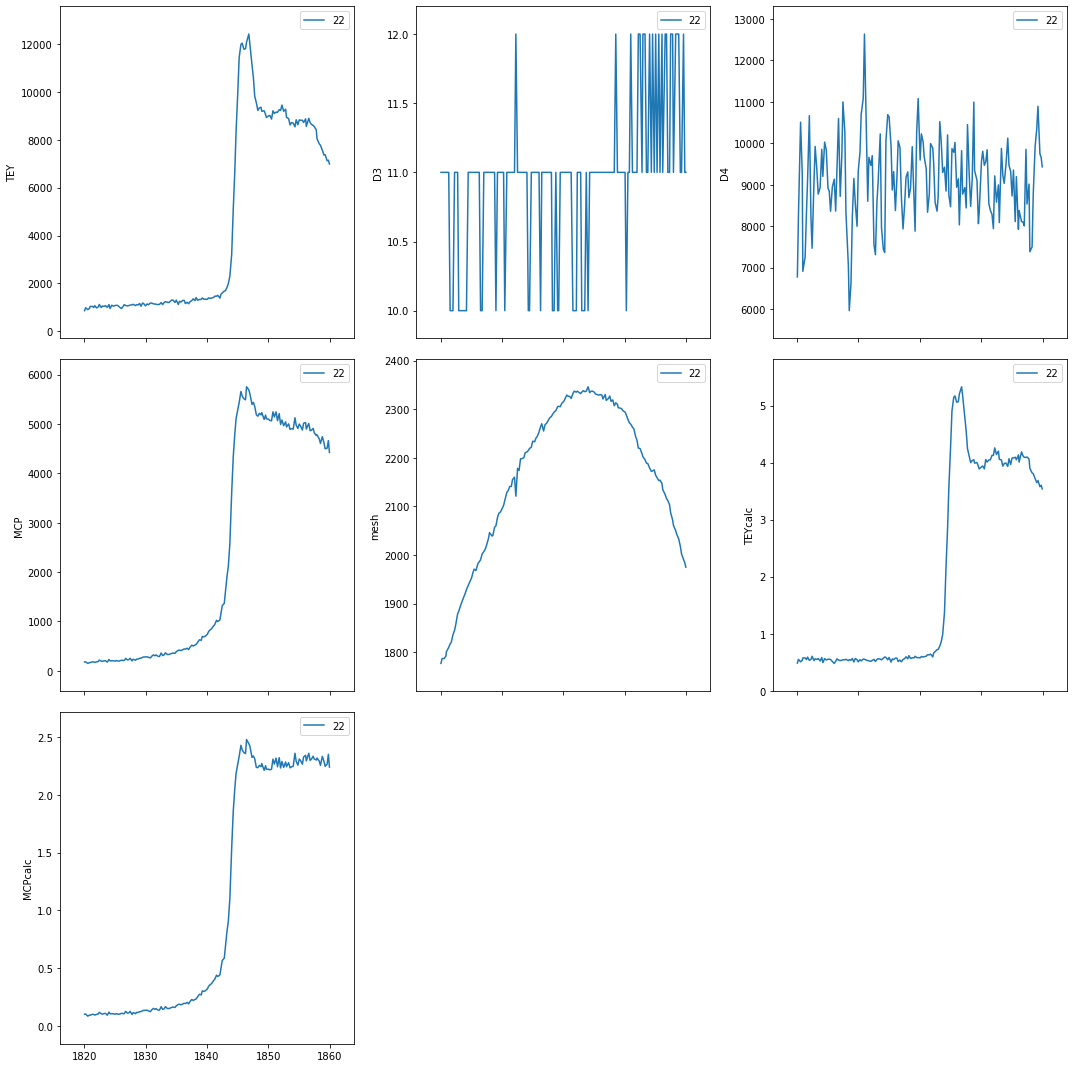

In [33]:
RE(bp.scan([scaler,TEYcalc,MCPcalc],mono.energy,1820,1860,40*4+1))

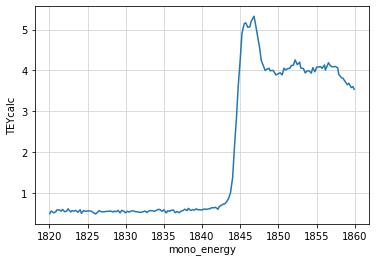

In [36]:
%matplotlib inline
plot_run(-1,mono.energy,TEYcalc)

In [37]:
mono.energy.move(1846)

MoveStatus(done=True, pos=mono_energy, elapsed=1.4, success=True, settle_time=0.0)

In [38]:
scaler.select_channels(['TEY','MCP','mesh'])



Transient Scan ID: 23     Time: 2021-12-01 20:37:44
Persistent Unique Scan ID: '91b8e9ed-428b-45c0-ab5c-23b14bf5a5e2'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1845.9872595                   |
|              mono_mirror_pitch | 1.927723388671875              |
|             mono_grating_pitch | 2.6141100830078123             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-----------------+------------+------------+------------+
|   seq_num |       time | kappa_motors_m2 |        TEY |        MCP |       mesh |
+-----------+------------+-----------------+------------+------------+------------+
|         1 | 20:37:53.6 |  -7500.03200000 |       1169 |        201 |       2333 |
|         2 | 20:37:54.5 |  -7392.17200000 |       1108 |  

('91b8e9ed-428b-45c0-ab5c-23b14bf5a5e2',)

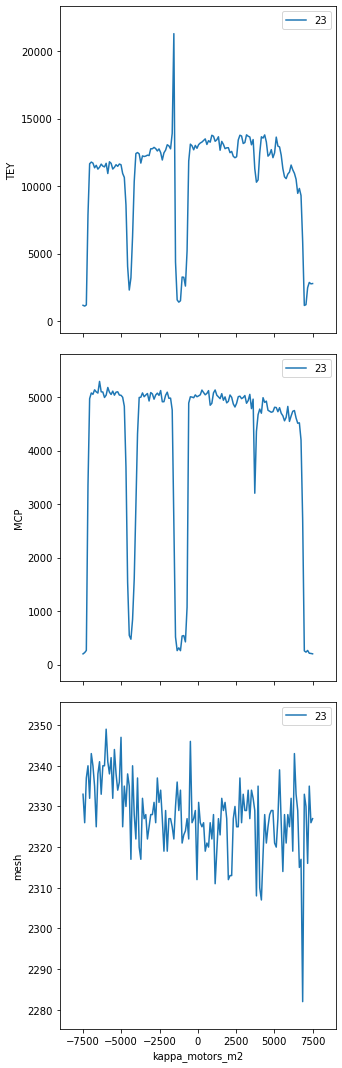

In [39]:
RE(bp.scan([scaler], x_motor, -7500, 7500, 140))

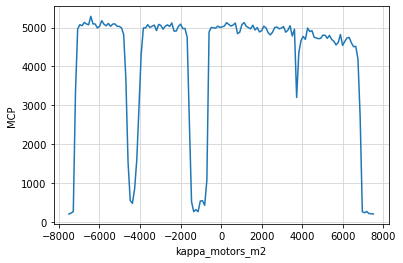

In [40]:
plot_latest(x_motor,MCP)

In [58]:
mprint_2()

x,y,z,tth,th,chi,phi = [7500.0,-0.0,1624.0,90.0,102.0,130.137,54.12]


[7500.0, -0.0, 1624.0, 90.0, 102.0, 130.137, 54.12]

In [43]:
x_motor.position

7500.101000000001

In [60]:
RE(mvsample([7500.0, -0.0, 1624.0, 90.0, 102.0, 130.137, 54.12]))

()

In [62]:
from IEX_29id.devices.kappa_motors import mprint

In [5]:
mprint()

x,y,z,tth,th,chi,phi = [7500.0,-0.0,1624.0,90.0,110.37,121.597,90.0]


[7500.0, -0.0, 1624.0, 90.0, 110.37, 121.597, 90.0]

In [9]:
RE(mvsample([6000.0, -0.0, 1624.0, 90.0, 102.0, 130.137, 54.12]))

()

In [20]:
E_F= make_scan_list([[670,684,1],[684,696,0.5],[696,715,1]])
E_Si =make_scan_list([[1820,1840,5],[1840,1850,1],[1850,1860,5]])

In [24]:
RE.halt()

Halting: skipping cleanup and marking exit_status as 'abort'...


Run aborted
Traceback (most recent call last):
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/run_engine.py", line 1479, in _run
    msg = self._plan_stack[-1].throw(
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 1307, in __call__
    return (yield from plan)
bluesky.utils.PlanHalt


+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
generator list_scan ['251da4eb'] (scan num: 24)





('251da4eb-e8e5-4c3b-a971-8cded1800c51',)



Transient Scan ID: 25     Time: 2021-12-01 21:12:34
Persistent Unique Scan ID: '68e06f29-c50a-4cfb-8f2d-b71779274612'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 672.0045699                    |
|              mono_mirror_pitch | 3.19755126953125               |
|             mono_grating_pitch | 4.33471005859375               |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |    TEYcalc |    MCPcalc |        TEY |         D3 |         D4 |        MCP |       mesh |
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+

('68e06f29-c50a-4cfb-8f2d-b71779274612',)

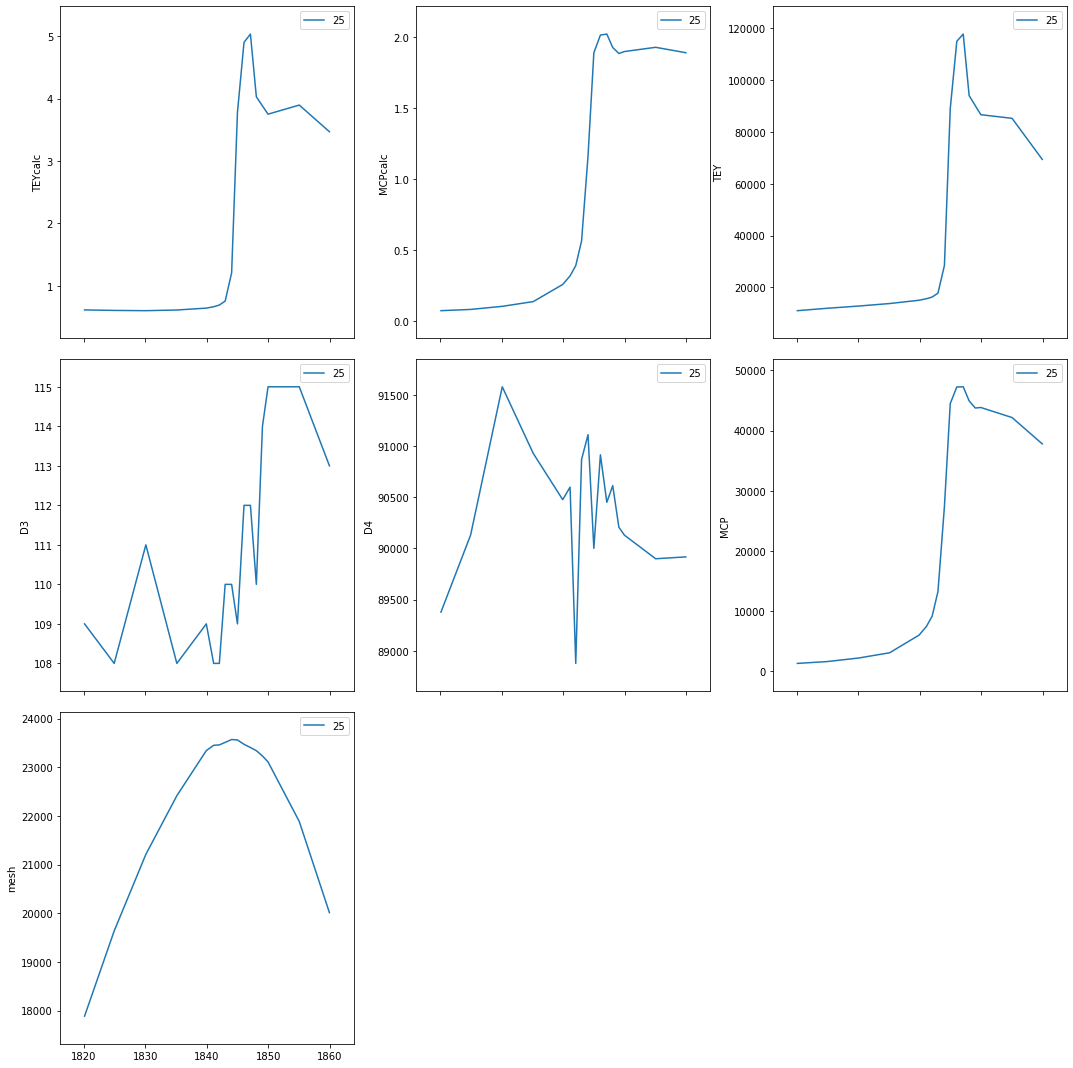

In [25]:
RE(bp.list_scan([scaler,TEYcalc,MCPcalc],mono.energy,E_Si))

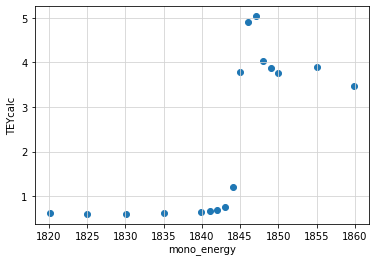

In [30]:
plot_scatter(mono.energy,TEYcalc)

In [11]:
E_F= make_scan_list([[670,684,1],[684,696,0.5],[696,715,1]])
E_Si =make_scan_list([[1820,1840,5],[1840,1850,1],[1850,1860,5]])


def myplan_Si():
#    yield from bps.mv(mono.energy,1840)
#    yield from bps.mv(undulator.energy,1.8926)
    for x in [5400,2000,-2600,-5750]:
        yield from bps.mv(x_motor,x)
        yield from bp.list_scan([scaler,TEYcalc,MCPcalc],mono.energy,E_Si)
        #yield from plot_latest(mono.energy,TEYcalc)

def myplan_F():
    # yield from bps.mv(mono.energy,690)
    # yield from bps.mv(undulator.energy,0.7089)
    for x in [5400,2000,-2600,-5750]:
        yield from bps.mv(x_motor,x)
        yield from bp.list_scan([scaler,TEYcalc,MCPcalc],mono.energy,E_F)  
        #yield from plot_latest(mono.energy,TEYcalc)
        
def test_plan():
    yield from plot_latest(mono.energy,TEYcalc)

/home/beams/29IDUSER/Documents/User_Folders/lastfigure.png


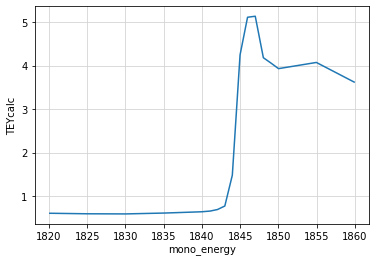

In [9]:
plot_latest(mono.energy,TEYcalc)



Transient Scan ID: 27     Time: 2021-12-01 21:46:57
Persistent Unique Scan ID: '870389e4-c9b8-47c5-b354-a0e3bc7bbb96'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.843714952468872              |
|                    mono_energy | 1839.9695517                   |
|              mono_mirror_pitch | 1.9309039306640625             |
|             mono_grating_pitch | 2.61842099609375               |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |        TEY |         D3 |         D4 |        MCP |       mesh |    TEYcalc |    MCPcalc |
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+

RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


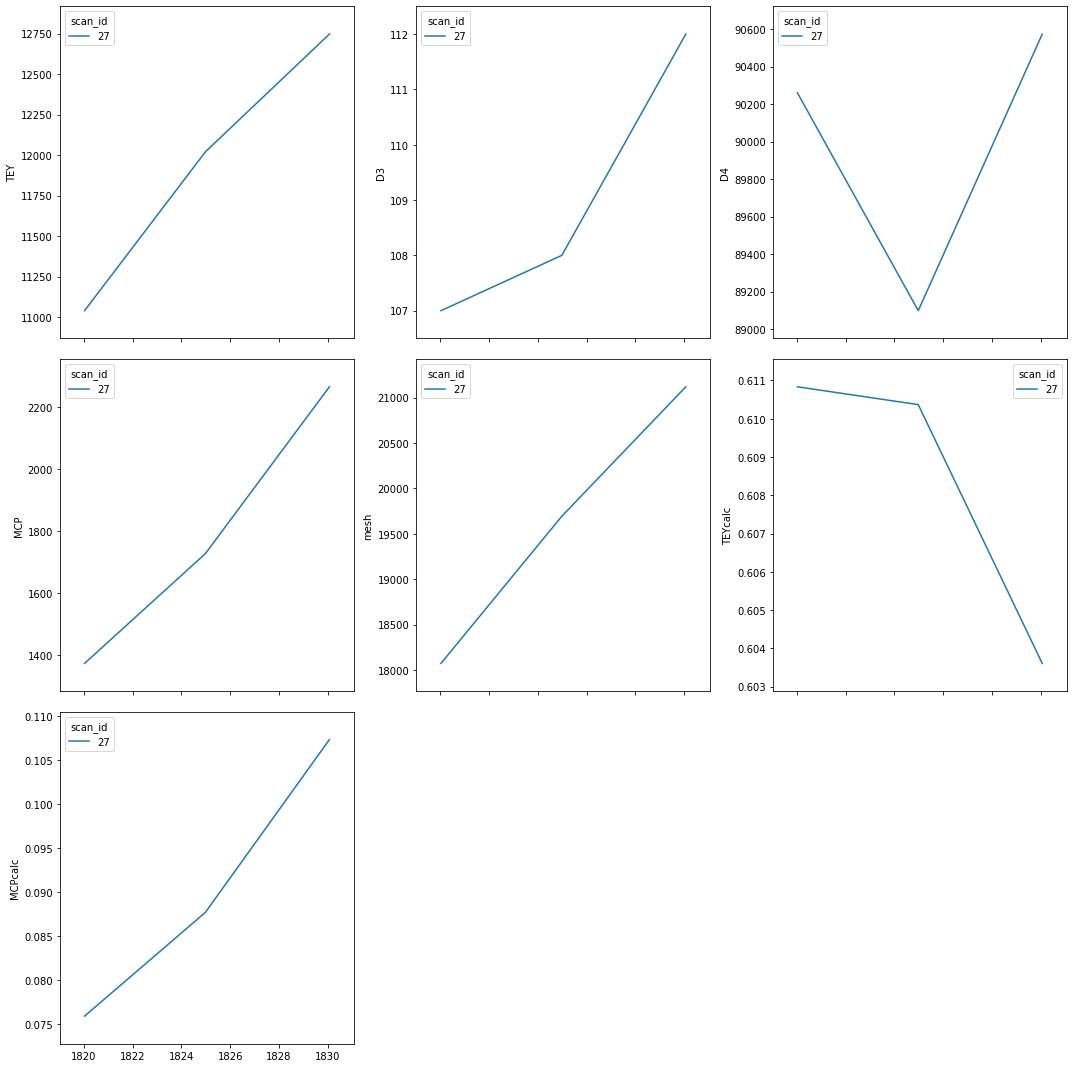

In [9]:
RE(myplan_Si())

In [10]:
RE.halt()

Halting: skipping cleanup and marking exit_status as 'abort'...


Run aborted
Traceback (most recent call last):
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/run_engine.py", line 1479, in _run
    msg = self._plan_stack[-1].throw(
  File "/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/preprocessors.py", line 1307, in __call__
    return (yield from plan)
bluesky.utils.PlanHalt


+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
generator list_scan ['870389e4'] (scan num: 27)





('870389e4-c9b8-47c5-b354-a0e3bc7bbb96',)

In [12]:
mono.energy.move(1840)

MoveStatus(done=True, pos=mono_energy, elapsed=1.4, success=True, settle_time=0.0)

In [13]:
undulator.energy.move(1.8926)

KeyboardInterrupt: 



Transient Scan ID: 28     Time: 2021-12-01 21:49:50
Persistent Unique Scan ID: 'a89bd255-c06a-4aed-9ea2-ae0c5f357ee7'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.842134714126587              |
|                    mono_energy | 1839.9669027                   |
|              mono_mirror_pitch | 1.93091796875                  |
|             mono_grating_pitch | 2.61841611328125               |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |        TEY |         D3 |         D4 |        MCP |       mesh |    TEYcalc |    MCPcalc |
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+

('a89bd255-c06a-4aed-9ea2-ae0c5f357ee7',
 '170634a3-3acc-4e34-82ca-bd74ecb08460',
 '7aa4ab08-bd1b-4da3-98b2-9605ffefeb5a',
 'f76eab11-5719-4aa2-9a10-46ac619f1390')

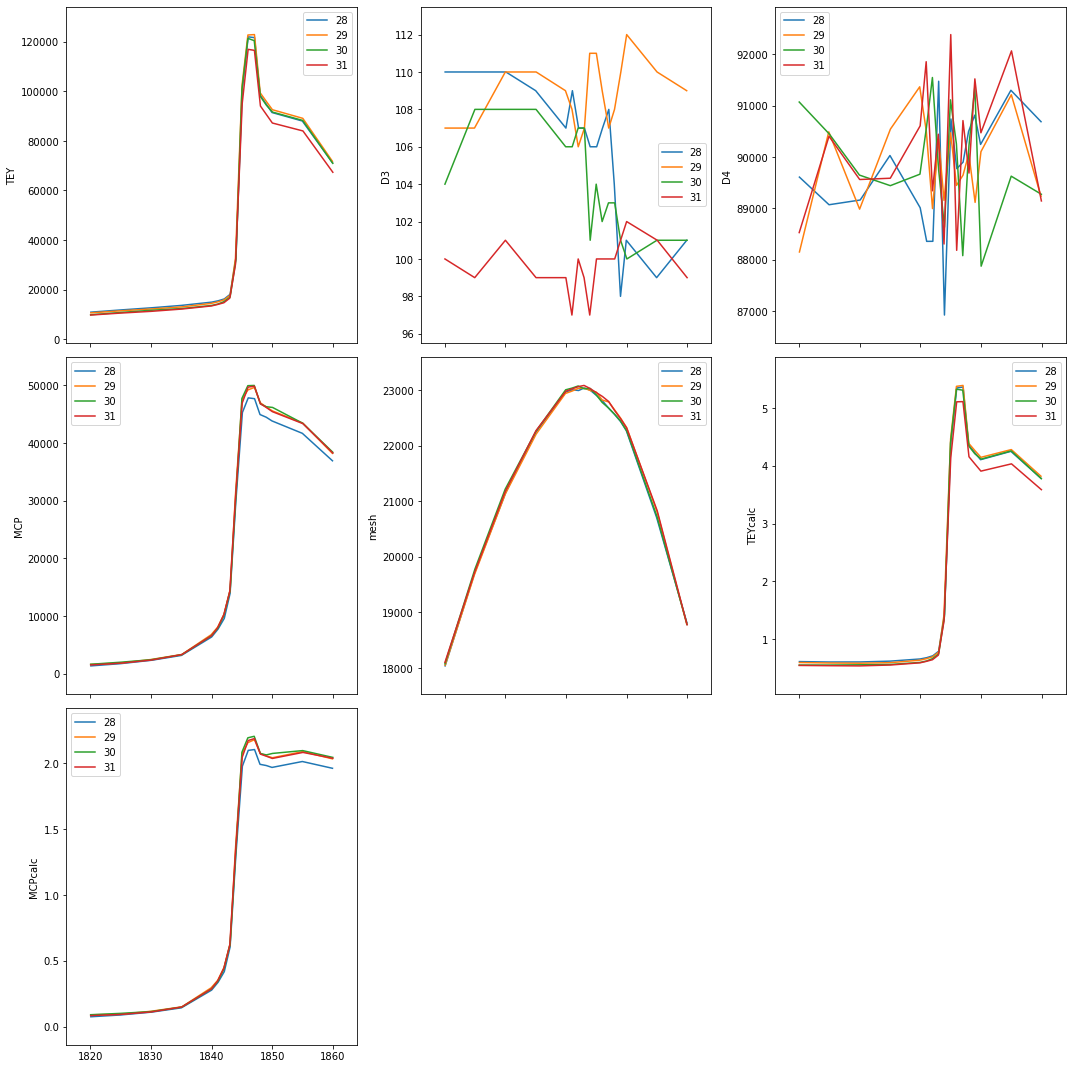

In [14]:
RE(myplan_Si())

In [15]:
mono.energy.move(690)

MoveStatus(done=True, pos=mono_energy, elapsed=17.9, success=True, settle_time=0.0)

In [16]:
undulator.energy.move(0.7089)

MoveStatus(done=True, pos=undulator_energy, elapsed=9.2, success=True, settle_time=0.0)



Transient Scan ID: 32     Time: 2021-12-01 21:56:44
Persistent Unique Scan ID: '51407baf-15ed-4c7a-8669-5ca0136f68bc'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6939646601676941             |
|                    mono_energy | 689.995281                     |
|              mono_mirror_pitch | 3.1554290771484377             |
|             mono_grating_pitch | 4.277730688476563              |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |        TEY |         D3 |         D4 |        MCP |       mesh |    TEYcalc |    MCPcalc |
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+

('51407baf-15ed-4c7a-8669-5ca0136f68bc',
 '96b60b2b-66c7-4803-b8cc-43ff7496d00a',
 'bc6ce823-d240-4e4e-bee3-714dce4aa39f',
 '903b9a1d-49c0-4108-b504-bf5652c2c5d6')

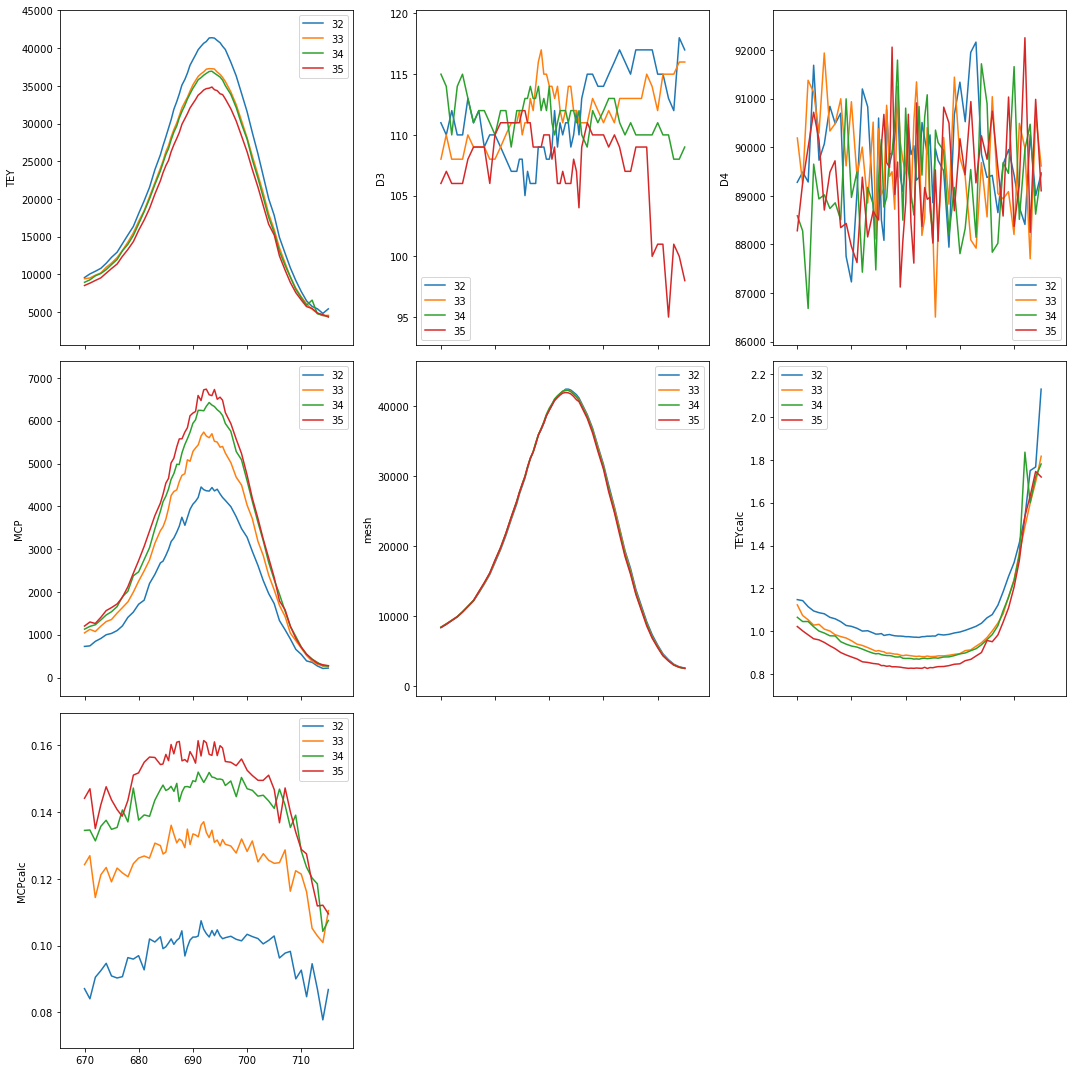

In [17]:
RE(myplan_F())

In [8]:
align_m3r.put(1)

In [8]:
E_F= make_scan_list([[670,684,1],[684,696,0.5],[696,715,1]])
E_Si =make_scan_list([[1820,1840,5],[1840,1850,1],[1850,1860,5]])


def myplan_Si():
#    yield from bps.mv(mono.energy,1840)
#    yield from bps.mv(undulator.energy,1.8926)
    for x in [5400,2000,-2600,-5750]:
        yield from bps.mv(x_motor,x)
        yield from bp.list_scan([scaler,TEYcalc,MCPcalc],mono.energy,E_Si)
        #yield from plot_latest(mono.energy,TEYcalc)

def myplan_F():
    # yield from bps.mv(mono.energy,690)
    # yield from bps.mv(undulator.energy,0.7089)
    for x in [5400,2000,-2600,-5750]:
        yield from bps.mv(x_motor,x)
        yield from bp.list_scan([scaler,TEYcalc,MCPcalc],mono.energy,E_F)  
        #yield from plot_latest(mono.energy,TEYcalc)
        
def align_m3r_plan():
    yield from bps.mv(align_m3r,1)

In [10]:
RE(test_plan())

()

In [12]:
RE(bps.sleep(10))

()

In [12]:
kth_motor.move(57+15)

MoveStatus(done=True, pos=kappa_motors_m8, elapsed=1.6, success=True, settle_time=0.0)

In [14]:
tth_motor.move(45)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=0.0, success=True, settle_time=0.0)

In [16]:
RE(SetSlit4(75))

()

In [23]:
mono.energy.move(690)

MoveStatus(done=True, pos=mono_energy, elapsed=17.8, success=True, settle_time=0.0)

In [24]:
undulator.energy.move(0.7089)

MoveStatus(done=True, pos=undulator_energy, elapsed=58.3, success=True, settle_time=0.0)

In [25]:
RE(bps.sleep(10))

()

In [26]:
RE(SetSlit4(150))

()

In [27]:
RE(bps.sleep(10))

()

In [28]:
RE(align_m3r_plan())

()

In [29]:
RE(bps.sleep(10))

()



Transient Scan ID: 36     Time: 2021-12-02 00:13:58
Persistent Unique Scan ID: 'f6e8c6a6-f70c-4fc5-be12-cc1fc736d200'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6939646601676941             |
|                    mono_energy | 690.0049109                    |
|              mono_mirror_pitch | 3.155469970703125              |
|             mono_grating_pitch | 4.277741064453125              |
|                    centroidM3R | 111.22648607975921             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |    TEYcalc |        TEY |         D3 |         D4 |        MCP |       mesh |    MCPcalc |
+-----------+------------+-------------+------------+----------

/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/callbacks/fitting.py:166: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer


End-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6937395334243774             |
|                    mono_energy | 714.9941415                    |
|              mono_mirror_pitch | 3.0996380615234376             |
|             mono_grating_pitch | 4.2021673339843755             |
|                    centroidM3R | 112.0                          |
+--------------------------------+--------------------------------+





Transient Scan ID: 37     Time: 2021-12-02 00:18:42
Persistent Unique Scan ID: '71d48e4f-d4fc-4f16-87ac-f4db0e2d4ac6'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6939646601676941             |
|                    mono_energy | 714.9923514                    |
|              mono_mirror_pitch | 3.0996020507812503             |
|             mono_grating_pitch | 4.2021502

('f6e8c6a6-f70c-4fc5-be12-cc1fc736d200',
 '71d48e4f-d4fc-4f16-87ac-f4db0e2d4ac6',
 '71738233-14b9-425e-be0c-9e8f8436a87c',
 '9b0c4020-76e0-42dc-8cea-b908a013478f')

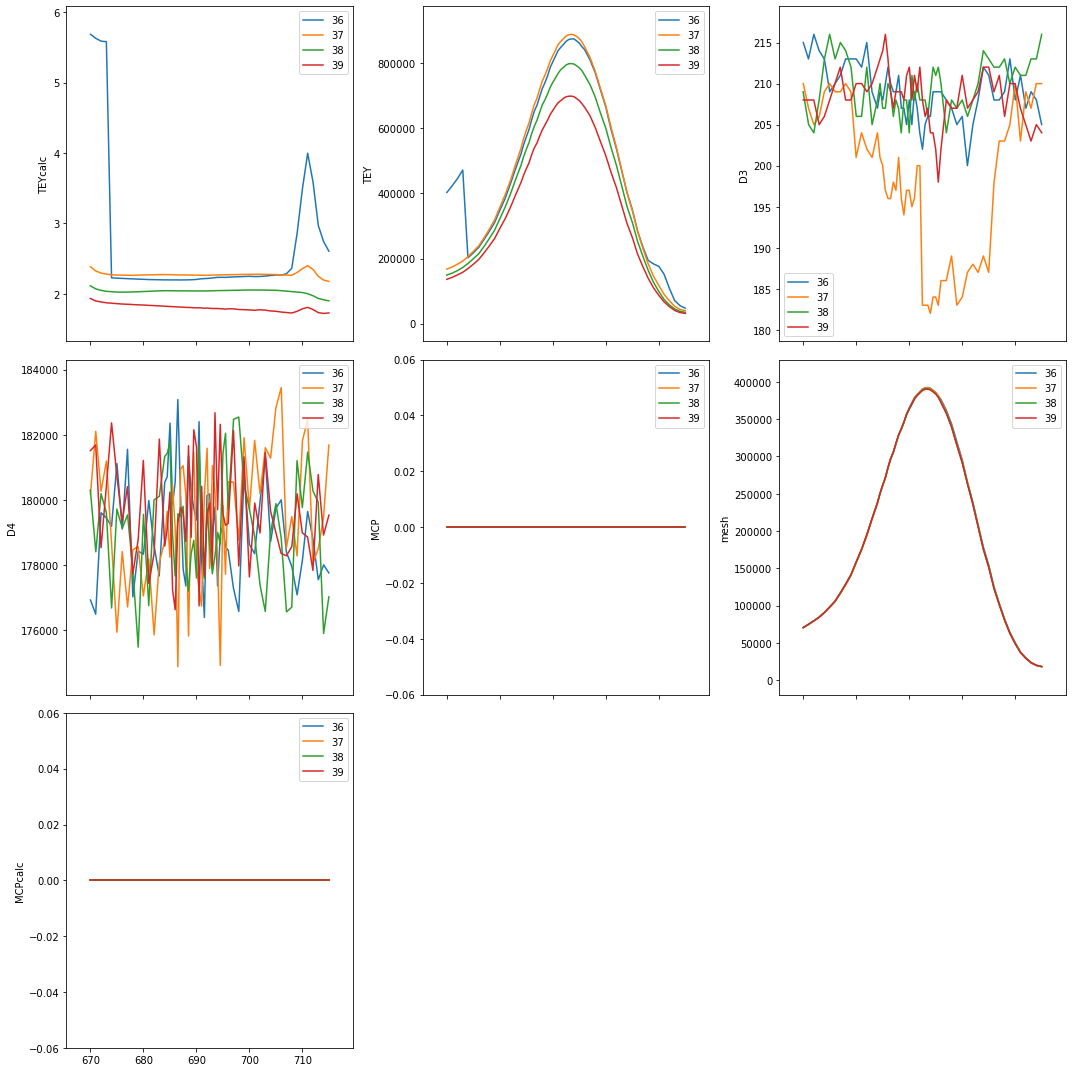

In [30]:
RE(myplan_F())

In [27]:
RE(bps.sleep(10))

()

In [28]:
RE(align_m3r_plan())

()

In [29]:
RE(bps.sleep(10))

()

In [ ]:
RE(myplan_F())

In [31]:
RE(SetSlit4(40))

()

In [32]:
mono.energy.move(1840)

MoveStatus(done=True, pos=mono_energy, elapsed=16.9, success=True, settle_time=0.0)

In [33]:
undulator.energy.move(1.8926)

MoveStatus(done=True, pos=undulator_energy, elapsed=26.7, success=True, settle_time=0.0)

In [34]:
RE(bps.sleep(10))

()

In [35]:
RE(align_m3r_plan())

()

In [36]:
RE(bps.sleep(10))

()



Transient Scan ID: 40     Time: 2021-12-02 00:35:05
Persistent Unique Scan ID: 'b506e94f-db81-4802-a102-9084bc746808'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8828586339950562             |
|                    mono_energy | 1839.9871678                   |
|              mono_mirror_pitch | 1.9308819580078125             |
|             mono_grating_pitch | 2.6183953613281252             |
|                    centroidM3R | 111.5889893128821              |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |    TEYcalc |        TEY |         D3 |         D4 |        MCP |       mesh |    MCPcalc |
+-----------+------------+-------------+------------+----------

('b506e94f-db81-4802-a102-9084bc746808',
 'fab744bb-c403-477c-84be-d1c6de3194d5',
 '04c9a89a-5502-4474-9872-a68385225270',
 'afc7db8f-5879-4c19-88fe-5412ff15060c')

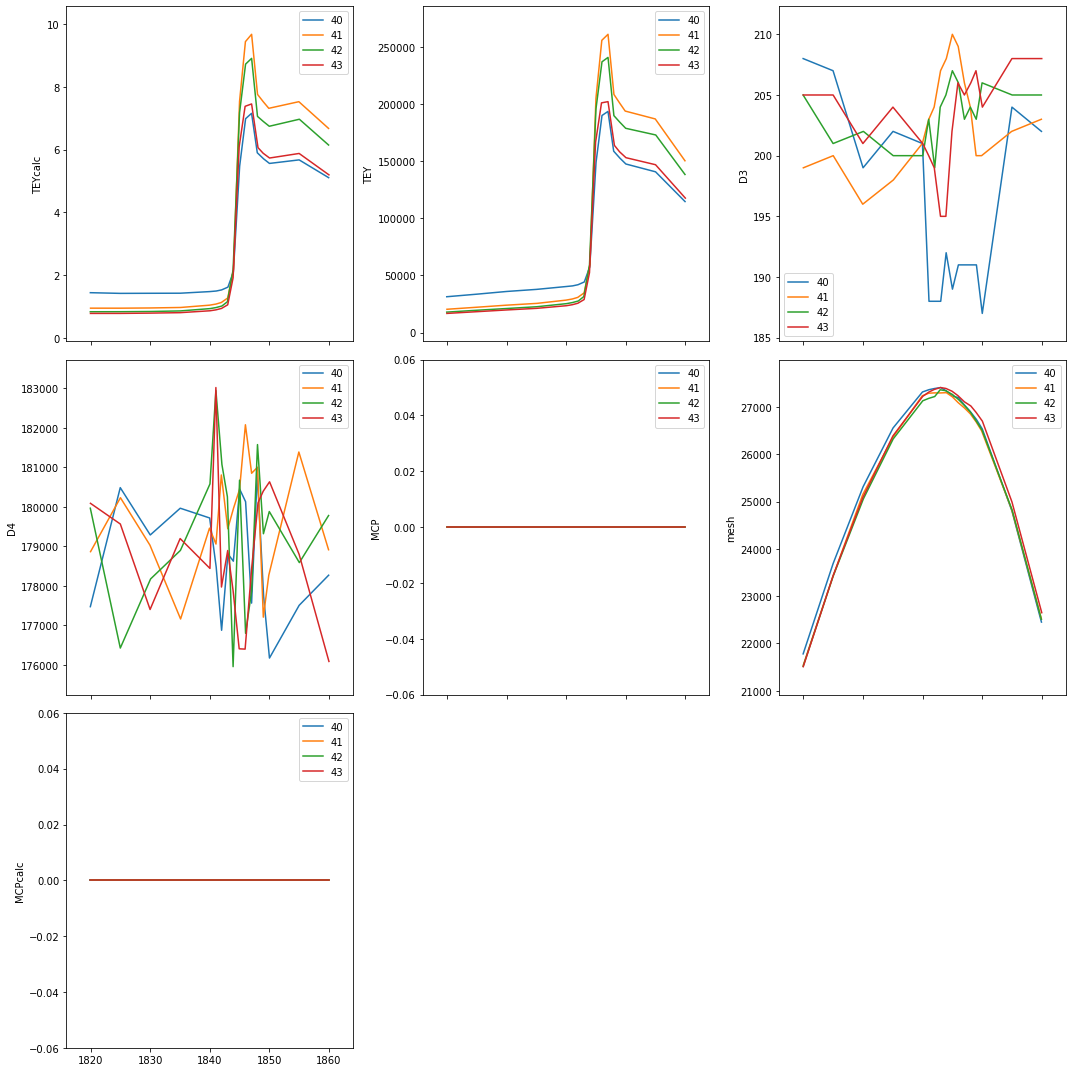

In [37]:
RE(myplan_Si())

In [38]:
RE(bps.sleep(10))

()

In [39]:
tth_motor.move(90)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=30.7, success=True, settle_time=0.0)

In [40]:
kth_motor.move(102)

MoveStatus(done=True, pos=kappa_motors_m8, elapsed=21.0, success=True, settle_time=0.0)

In [41]:
mono.energy.move(690)

MoveStatus(done=True, pos=mono_energy, elapsed=17.8, success=True, settle_time=0.0)

In [42]:
undulator.energy.move(0.7089)

MoveStatus(done=True, pos=undulator_energy, elapsed=58.3, success=True, settle_time=0.0)

In [43]:
RE(bps.sleep(10))

()

In [44]:
RE(SetSlit4(150))

()

In [45]:
RE(bps.sleep(10))

()

In [46]:
RE(align_m3r_plan())

()

In [47]:
RE(bps.sleep(10))

()



Transient Scan ID: 44     Time: 2021-12-02 00:44:59
Persistent Unique Scan ID: 'c983a10f-c891-405b-a187-3f837dd58b5b'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6937395334243774             |
|                    mono_energy | 690.0017537                    |
|              mono_mirror_pitch | 3.1554791259765627             |
|             mono_grating_pitch | 4.27770810546875               |
|                    centroidM3R | 111.13776630668569             |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |    TEYcalc |        TEY |         D3 |         D4 |        MCP |       mesh |    MCPcalc |
+-----------+------------+-------------+------------+----------

RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


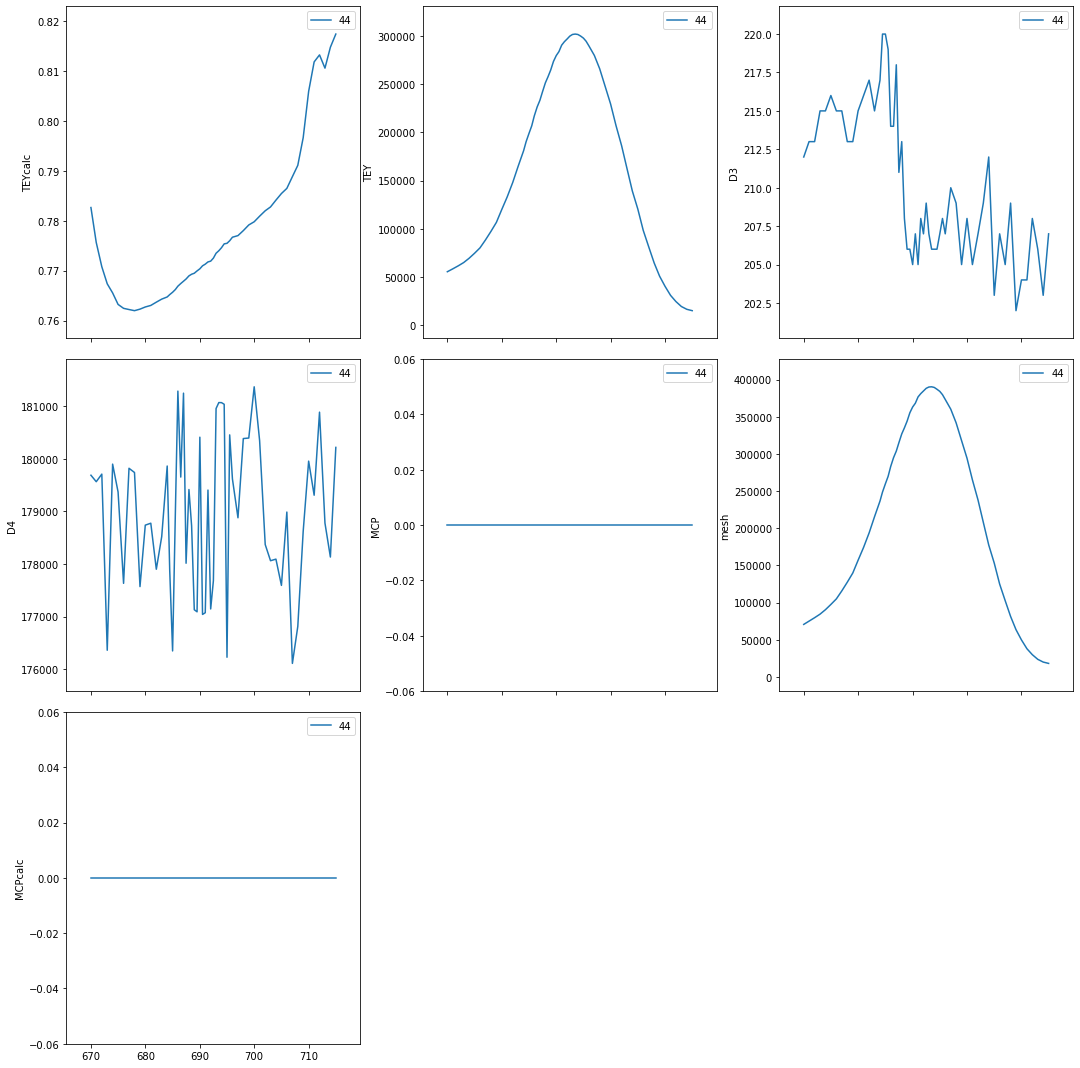

In [48]:
RE(myplan_F())

In [49]:
RE.stop() 

Stopping: running cleanup and marking exit_status as 'success'...


('c983a10f-c891-405b-a187-3f837dd58b5b',)

In [53]:
scaler.select_channels(['TEY','MCP','mesh'])

In [54]:
mono.energy.move(690)

MoveStatus(done=True, pos=mono_energy, elapsed=1.3, success=True, settle_time=0.0)

In [55]:
RE(bps.sleep(10))

()

In [56]:
RE(align_m3r_plan())

()

In [57]:
RE(bps.sleep(30))

()



Transient Scan ID: 45     Time: 2021-12-02 00:58:00
Persistent Unique Scan ID: '5ec7223f-4e53-4112-9ff5-e81bda756394'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6935146450996399             |
|                    mono_energy | 690.0023032                    |
|              mono_mirror_pitch | 3.1553967285156252             |
|             mono_grating_pitch | 4.277720922851563              |
|                    centroidM3R | 110.88341288510289             |
|                kappa_motors_m2 | 5400.001                       |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |    TEYcalc |        TEY |        MCP |       mesh |    MCPcalc |
+-----------+------------+-------------+-------

('5ec7223f-4e53-4112-9ff5-e81bda756394',
 '1cd5b186-96b2-47c4-bed1-b37d33580219',
 'ff0dc01e-ca70-4895-b621-a518b2890dff',
 '4049e488-fb14-49c3-9b01-03043d5f78e3')

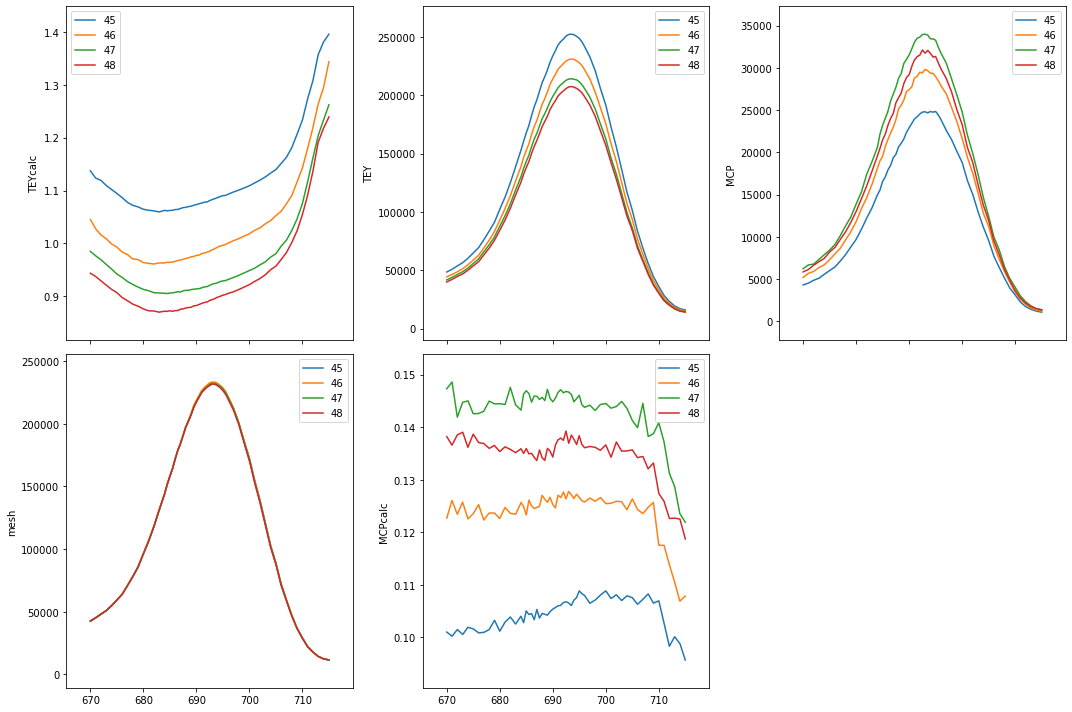

In [58]:
RE(myplan_F())

In [59]:
tth_motor.move(40)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=34.0, success=True, settle_time=0.0)

In [60]:
kth_motor.move(57+15)

MoveStatus(done=True, pos=kappa_motors_m8, elapsed=21.2, success=True, settle_time=0.0)

In [61]:
mono.energy.move(690)

MoveStatus(done=True, pos=mono_energy, elapsed=2.0, success=True, settle_time=0.0)

In [62]:
RE(bps.sleep(10))

()

In [63]:
RE(align_m3r_plan())

()

In [64]:
RE(bps.sleep(30))

()



Transient Scan ID: 49     Time: 2021-12-02 01:17:08
Persistent Unique Scan ID: '5b80f8df-6b4d-4a24-a4a4-f39dd4230498'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6939646601676941             |
|                    mono_energy | 690.0131534                    |
|              mono_mirror_pitch | 3.1553973388671874             |
|             mono_grating_pitch | 4.277710546875                 |
|                    centroidM3R | 111.26007829132614             |
|                kappa_motors_m2 | 5399.997                       |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |    TEYcalc |        TEY |        MCP |       mesh |    MCPcalc |
+-----------+------------+-------------+-------

/home/beams/RODOLAKIS/.conda/envs/bluesky_2022_1/lib/python3.9/site-packages/bluesky/callbacks/fitting.py:166: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer


End-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6939646601676941             |
|                    mono_energy | 715.0175126                    |
|              mono_mirror_pitch | 3.099696044921875              |
|             mono_grating_pitch | 4.202167944335938              |
|                    centroidM3R | 111.5                          |
|                kappa_motors_m2 | 5400.02                        |
+--------------------------------+--------------------------------+





Transient Scan ID: 50     Time: 2021-12-02 01:21:19
Persistent Unique Scan ID: '605bd83e-0159-4860-8600-77f053f88691'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6937395334243774             |
|                    mono_energy | 715.0027717                    |
|              mono_mirror_pitch | 3.0996337

('5b80f8df-6b4d-4a24-a4a4-f39dd4230498',
 '605bd83e-0159-4860-8600-77f053f88691',
 'fa531c5a-01a7-4d10-8d05-854cb47b238d',
 '05e9d7b3-ffac-486b-9c73-9e995fa69aca')

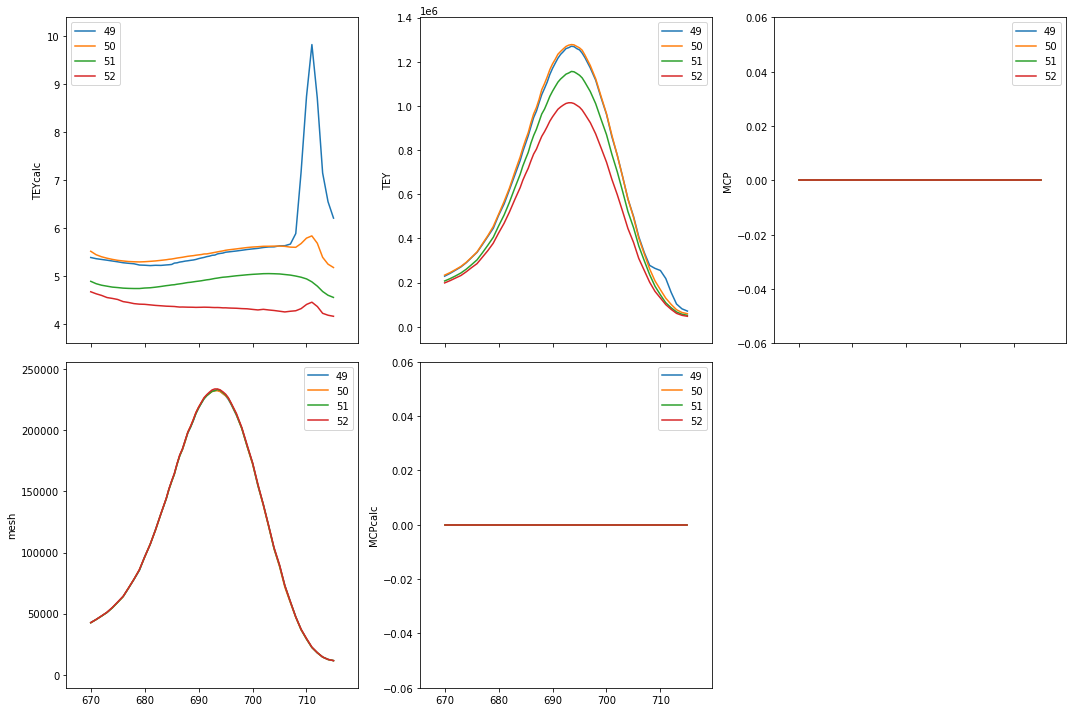

In [65]:
RE(myplan_F())

In [66]:
RE(SetSlit4(40))

()

In [67]:
mono.energy.move(1840)

MoveStatus(done=True, pos=mono_energy, elapsed=17.0, success=True, settle_time=0.0)

In [68]:
undulator.energy.move(1.8926)

MoveStatus(done=True, pos=undulator_energy, elapsed=26.7, success=True, settle_time=0.0)

In [69]:
RE(bps.sleep(30))

()

In [70]:
RE(align_m3r_plan())

()

In [71]:
RE(bps.sleep(30))

()



Transient Scan ID: 53     Time: 2021-12-02 01:36:23
Persistent Unique Scan ID: '76032634-983b-4b84-a1ba-2614de448689'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 1.8836661577224731             |
|                    mono_energy | 1839.9999496                   |
|              mono_mirror_pitch | 1.9309039306640625             |
|             mono_grating_pitch | 2.618390478515625              |
|                    centroidM3R | 111.60946292359635             |
|                kappa_motors_m2 | 5399.95                        |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+-------------+------------+------------+------------+------------+------------+
|   seq_num |       time | mono_energy |    TEYcalc |        TEY |        MCP |       mesh |    MCPcalc |
+-----------+------------+-------------+-------

('76032634-983b-4b84-a1ba-2614de448689',
 '42dd6f76-d1fe-4749-b22e-9c00db9d8b50',
 '7a0c0c08-1f1f-4761-bc0c-19c369898372',
 '7140a612-d0d6-48df-92c6-b34ffdb5d57d')

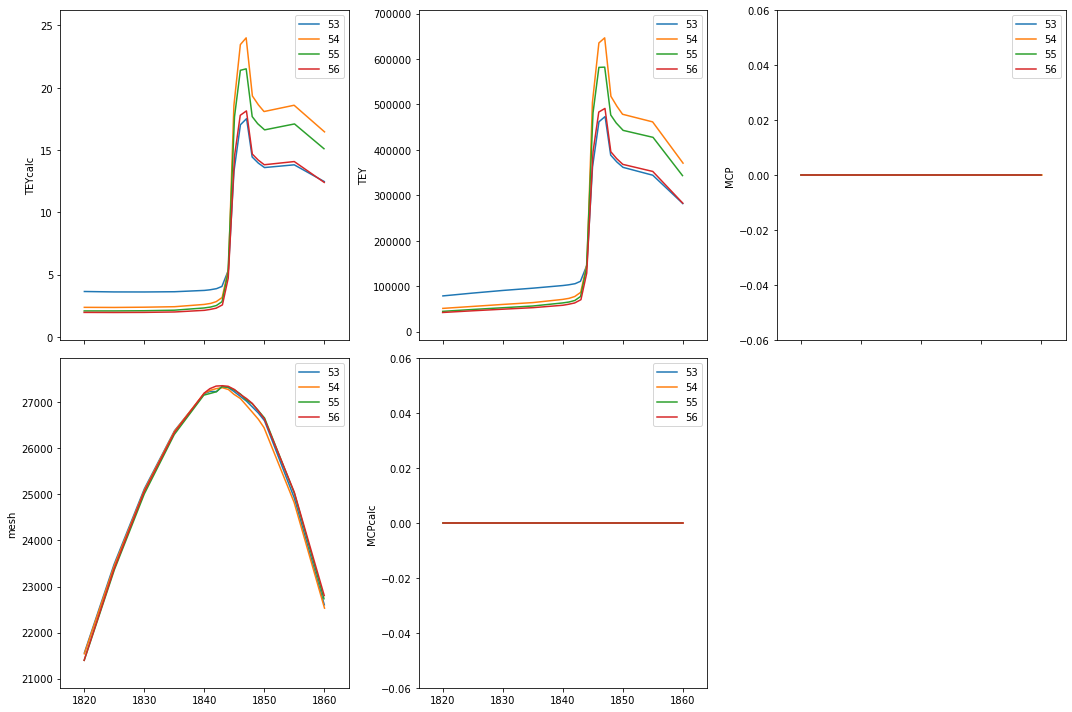

In [72]:
RE(myplan_Si())